In [1]:
import gymnasium as gym
import numpy as np

# Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.8       # learning rate
gamma = 0.96      # discount factor
epsilon = 1.0     # exploration rate
epsilon_decay = 0.9995
epsilon_min = 0.01
episodes = 5000
max_steps = 100

# Training loop
for episode in range(episodes):
    state, info = env.reset()   # Gymnasium reset returns (obs, info)
    done = False
    
    for _ in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        # Take action
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated  # Gymnasium splits "done" into two flags

        # Q-learning update
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * Q[next_state, best_next_action] - Q[state, action]
        )

        state = next_state
        if done:
            break

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

print("Trained Q-table:")
print(Q)

Trained Q-table:
[[0.78275779 0.8153727  0.8153727  0.78275779]
 [0.78275779 0.         0.84934656 0.8153727 ]
 [0.8153727  0.884736   0.8153727  0.84934656]
 [0.84934656 0.         0.8153727  0.8153727 ]
 [0.8153727  0.84934656 0.         0.78275779]
 [0.         0.         0.         0.        ]
 [0.         0.9216     0.         0.84934656]
 [0.         0.         0.         0.        ]
 [0.84934656 0.         0.884736   0.8153727 ]
 [0.84934656 0.9216     0.9216     0.        ]
 [0.884736   0.96       0.         0.884736  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9216     0.96       0.884736  ]
 [0.9216     0.96       1.         0.9216    ]
 [0.         0.         0.         0.        ]]


In [2]:
wins = 0
episodes = 100

for _ in range(episodes):
    state, info = env.reset()
    done = False
    while not done:
        action = np.argmax(Q[state])  # exploit learned policy
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    wins += reward

print(f"Win rate over {episodes} episodes: {wins/episodes * 100:.2f}%")

Win rate over 100 episodes: 100.00%


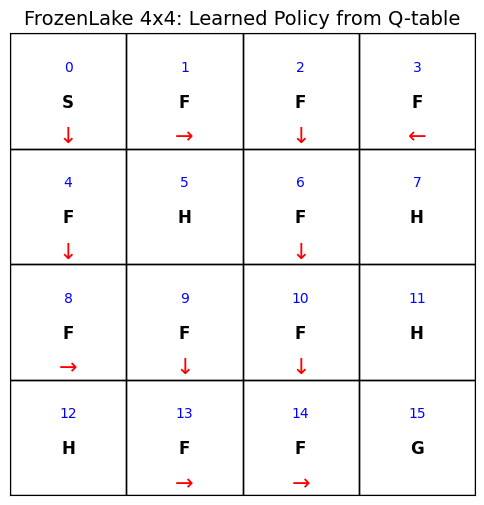

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define FrozenLake grid
grid = [
    ["S", "F", "F", "F"],
    ["F", "H", "F", "H"],
    ["F", "F", "F", "H"],
    ["H", "F", "F", "G"]
]

# Extract greedy policy from Q-table
policy = np.argmax(Q, axis=1)

# Map actions to arrows
action_arrows = {0:"←", 1:"↓", 2:"→", 3:"↑"}

# Draw FrozenLake grid with policy arrows
fig, ax = plt.subplots(figsize=(6,6))
state = 0
for i in range(4):
    for j in range(4):
        ax.add_patch(plt.Rectangle((j, 3-i), 1, 1, fill=False))
        ax.text(j+0.5, 3-i+0.7, str(state), ha="center", va="center", fontsize=10, color="blue")
        ax.text(j+0.5, 3-i+0.4, grid[i][j], ha="center", va="center", fontsize=12, fontweight="bold")
        if grid[i][j] not in ["H", "G"]:  # no arrows in holes or goal
            ax.text(j+0.5, 3-i+0.1, action_arrows[policy[state]], 
                    ha="center", va="center", fontsize=16, color="red")
        state += 1

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("FrozenLake 4x4: Learned Policy from Q-table", fontsize=14)
plt.show()
